<a href="https://colab.research.google.com/github/michellechen202212/udacity-datascience/blob/main/blogPost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Data Science Blog Post

This notebook is part of a Data Science Blog Post project and leverages the CRISP-DM framework to analyze the [Business Formation Statistics Weekly Data](https://www.census.gov/econ/bfs/csv/bfs_us_apps_weekly_nsa.csv). It provides a comprehensive exploration of the dataset, addressing key business-related questions and uncovering actionable insights.

###Key Components:

**Introduction:**
This project tackles specific business-focused questions by identifying important features, uncovering creative insights, and exploring predictions in hypothetical scenarios using data science methodologies.

**Business Understanding:**
The dataset offers valuable insights into U.S. entrepreneurial activity, helping stakeholders like economists and policymakers monitor trends and assess the economic landscape.

**Data Understanding: **
Features such as HBA_NSA (High-Propensity Applications), Year, and WBA_NSA (Applications with Planned Wages) are analyzed for their impact on predicting total business activity. These features are classified into categories based on their influence (major, moderate, or secondary).

**Exploratory Analysis and Feature Insights:**
Key drivers such as HBA_NSA and Year are highlighted for their significant role in predictions. Seasonal and annual trends are explored to add further context to business application patterns.

**Modeling and Predictions:**
The notebook evaluates model performance in both average and hypothetical scenarios:

Linear Regression: Shows high sensitivity to feature changes, making it effective for simple linear relationships.
Random Forest: Captures complex, non-linear interactions, offering balanced and realistic predictions.

### Questions Addressed:

**Feature Importance:**
What are the most significant features in the dataset, what do they represent, and how do they influence the predictions?

**Creative Insights:**
What unique or creative insights can be derived from the dataset?

**Model Accuracy:**
How accurate is the trained model in predicting the outcomes?

**Predictive Scenarios:**
What would happen in a creative predictive scenario using the trained model?


## Business Understanding:

The Business Formation Statistics (BFS) Weekly Data tracks trends in business applications across national, regional, and state levels, providing critical insights into U.S. entrepreneurial activity. Reviewed under strict data integrity and confidentiality standards, this dataset transitioned to monthly releases in September 2024, consolidating weekly estimates for improved accessibility. By analyzing Not Seasonally Adjusted Business Applications, the data offers near-real-time monitoring of economic trends, policy impacts, and regional business growth. Economists, policymakers, and analysts can leverage this resource to assess the health of the business ecosystem, forecast economic outcomes, and shape strategies to support entrepreneurship and economic development nationwide.


##Data Understanding:
The dataset features are clearly described, including HBA_NSA, WBA_NSA, and others, along with their significance.


## Modularized Predictive Modeling Notebook

This notebook demonstrates a modular approach to predictive modeling using the provided dataset.
It includes separate functions for data loading, preparation, training, evaluation, and visualization.


In [ ]:
import pandas as pd

class DataLoader:
    """
    Class for loading the dataset.
    """
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        """
        Loads the dataset from the given file path.

        Returns:
        - pd.DataFrame: Loaded dataset.
        """
        try:
            data = pd.read_csv(self.file_path)
            print(f"Data loaded successfully from {self.file_path}")
            return data
        except FileNotFoundError:
            print(f"File not found: {self.file_path}")
            return None

class DataAnalyzer:
    """
    Class for analyzing the dataset.
    """
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column

    def analyze_data(self):
        """
        Analyzes the dataset and displays basic information, missing values,
        and summary statistics.

        Returns:
        - X (pd.DataFrame): Features (independent variables).
        - y (pd.Series): Target variable (dependent variable).
        """
        # Dataset Information
        print("Dataset Information:")
        print(self.data.info())
        print("\nDataset Shape:", self.data.shape)

        # Check for Missing Values
        missing_values = self.data.isnull().sum()
        if missing_values.any():
            print("\nMissing Values:")
            print(missing_values[missing_values > 0])
        else:
            print("\nNo missing values in the dataset.")

        # Summary Statistics (excluding the target column)
        print("\nSummary Statistics (excluding the target column):")
        print(self.data.drop(columns=[self.target_column]).describe())

        # Separate Features and Target
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        return X, y

if __name__ == "__main__":
    # Load dataset
    file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
    loader = DataLoader(file_path)
    data = loader.load_data()

    if data is not None:
        # Define target column
        target_column = 'BA_NSA'

        # Analyze dataset
        analyzer = DataAnalyzer(data, target_column)
        X, y = analyzer.analyze_data()

        # Display features and target
        print("\nFeatures (X):")
        print(X.head())
        print("\nTarget (y):")
        print(y.head())


Data loaded successfully from sample_data/bfs_us_apps_weekly_nsa.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        986 non-null    int64  
 1   Week        986 non-null    int64  
 2   BA_NSA      986 non-null    int64  
 3   HBA_NSA     986 non-null    int64  
 4   WBA_NSA     986 non-null    int64  
 5   CBA_NSA     986 non-null    int64  
 6   YY_BA_NSA   932 non-null    float64
 7   YY_HBA_NSA  932 non-null    float64
 8   YY_WBA_NSA  932 non-null    float64
 9   YY_CBA_NSA  932 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 77.2 KB
None

Dataset Shape: (986, 10)

Missing Values:
YY_BA_NSA     54
YY_HBA_NSA    54
YY_WBA_NSA    54
YY_CBA_NSA    54
dtype: int64

Summary Statistics (excluding the target column):
              Year        Week       HBA_NSA       WBA_NSA       CBA_NSA  \
count 


### What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome?

**1. High-Propensity Applications (HBA_NSA)**
- **What It Means**: Business applications likely to succeed, hire employees, and contribute to economic growth.
- **How It Drives Predictions**: The most significant feature, heavily influencing predictions as these applications represent a large portion of total business activity.


**2. Year**
- **What It Means**: Tracks long-term economic trends such as booms or recessions.
- **How It Drives Predictions**: A major driver, providing context for increases or decreases in business activity over time.


**3. Applications with Planned Wages (WBA_NSA)**
- **What It Means**: Indicates businesses planning to hire employees and establish payroll.
- **How It Drives Predictions**: Moderately influences predictions by reflecting entrepreneurial confidence and labor market intentions.


**4. Corporation Applications (CBA_NSA)**
- **What It Means**: Applications to form corporations, representing larger and more formal business ventures.
- **How It Drives Predictions**: Adds depth by highlighting trends in formalized business activity.

**5. Yearly Changes (YY Metrics)**
- **What It Means**: Tracks annual growth or decline in specific types of business applications.
- **How It Drives Predictions**: Provides additional context for trends but has a smaller overall impact.


**6. Week**
- **What It Means**: Reflects seasonal patterns in business applications, such as busy periods at the start of the year.
- **How It Drives Predictions**: Plays a minor role, fine-tuning predictions with seasonal trends.

**Summary of Key Drivers**

- **Major Influences**:  
  - **HBA_NSA**: Dominates predictions due to its strong relationship with total business activity.  
  - **Year**: Captures long-term economic trends, shaping the overall prediction.

- **Moderate Influences**:  
  - **WBA_NSA** and **CBA_NSA**: Add valuable details about hiring plans and formal business ventures.

- **Secondary Influences**:  
  - **YY Metrics** and **Week**: Provide additional nuance by capturing annual and seasonal trends but have less impact.

By focusing on these key features, the model can provide accurate and meaningful predictions for total business applications.



## Data Preparation:

**Data Cleaning and Missing Values Handling Strategy**
- Numerical columns with missing values were imputed using the mean strategy. This approach is suitable for maintaining data consistency, especially when the missing values are not heavily skewed.
- Alternative strategies, such as median imputation, could be used for skewed data, while KNN imputation may be considered for datasets with complex relationships between features.
- For this dataset, the mean was chosen for its simplicity and effectiveness in maintaining the dataset's overall statistical properties.
- This dataset does not contain any categorical data.


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

class MissingValueHandler:
    """
    A class to handle missing values in a dataset.
    """
    def __init__(self, data, numerical_columns_with_na, target_column, threshold=0.8):
        """
        Initializes the MissingValueHandler.

        Args:
        - data (pd.DataFrame): The dataset.
        - numerical_columns_with_na (list): List of numerical columns with missing values.
        - target_column (str): The name of the target column.
        - threshold (float): The threshold for dropping columns (default is 0.8).
        """
        if data is None or not isinstance(data, pd.DataFrame):
          raise ValueError("The provided 'data' must be a valid pandas DataFrame.")

        self.data = data
        self.numerical_columns_with_na = numerical_columns_with_na
        self.target_column = target_column
        self.threshold = threshold

    def handle_missing_values(self):
        """
        Processes the dataset to handle missing values by dropping rows/columns and imputing values.

        Returns:
        - pd.DataFrame: Cleaned feature dataset with missing values handled.
        - pd.Series: Aligned target variable.
        """
        # Drop rows with missing values
        data_cleaned = self.data.dropna()

        # Drop columns with a high percentage of missing values
        data_cleaned = data_cleaned.dropna(axis=1, thresh=self.threshold * len(self.data))

        # Impute missing values in numerical columns
        imputer = SimpleImputer(strategy='mean')
        data_cleaned[self.numerical_columns_with_na] = imputer.fit_transform(data_cleaned[self.numerical_columns_with_na])

        # Align target variable with cleaned feature dataset
        y_cleaned = data_cleaned[self.target_column]
        data_cleaned = data_cleaned.drop(columns=[self.target_column])  # Remove target column from features

        return data_cleaned, y_cleaned

    def show_missing_values_summary(self):
        """
        Displays the summary of missing values in the dataset.
        """
        missing_values = self.data.isnull().sum()
        if missing_values.any():
            print("Missing Values Summary:")
            print(missing_values[missing_values > 0])
        else:
            print("No missing values in the dataset.")


if __name__ == "__main__":

    # Define columns with missing values and the target column
    numerical_columns_with_na = ['YY_BA_NSA', 'YY_HBA_NSA', 'YY_WBA_NSA', 'YY_CBA_NSA']
    target_column = 'BA_NSA'

    # Initialize the MissingValueHandler
    handler = MissingValueHandler(data, numerical_columns_with_na, target_column)

    # Show missing value summary
    handler.show_missing_values_summary()

    # Handle missing values
    data_cleaned, y_cleaned = handler.handle_missing_values()

    # Print cleaned data
    print(data_cleaned.head())
    print(y_cleaned.head())





Missing Values Summary:
YY_BA_NSA     54
YY_HBA_NSA    54
YY_WBA_NSA    54
YY_CBA_NSA    54
dtype: int64
    Year  Week  HBA_NSA  WBA_NSA  CBA_NSA  YY_BA_NSA  YY_HBA_NSA  YY_WBA_NSA  \
52  2007     1    24360    15840    14320       4.70        7.84        5.88   
53  2007     2    10690     7110     6490     -52.28      -53.84      -55.11   
54  2007     3    44800    28820    26000      17.79       19.56       17.73   
55  2007     4    30390    19270    17120      -2.08       -1.14       -4.93   
56  2007     5    35780    22250    19900      -0.33        0.22       -2.50   

    YY_CBA_NSA  
52       11.88  
53      -54.99  
54       19.65  
55       -0.87  
56       -0.25  
52    41440
53    17620
54    74560
55    50830
56    61230
Name: BA_NSA, dtype: int64


###What unusual, or creative, insights are you able to gather from the data set?

**1. Time Drives Business Trends**
- **Observation**: The feature **Year** has the strongest impact, showing that long-term economic trends shape business activity more than short-term fluctuations.
- **Insight**: Big-picture policies focusing on economic stability and growth are more effective than reactive short-term measures.

**2. High-Propensity Applications Lead the Way**
- **Observation**: Businesses with strong growth potential (HBA_NSA) dominate the dataset’s influence on total applications.
- **Insight**: Supporting these businesses through targeted incentives or programs could maximize economic impact.

**3. Seasonal Trends Matter**
- **Observation**: The feature **Week** reveals minor seasonal variations, with quieter periods during certain times of the year.
- **Insight**: Utilize these slower periods to launch promotional campaigns or entrepreneurship workshops.

**4. Yearly Changes Show Surprises**
- **Observation**: Year-over-Year (YY) metrics indicate that business trends don’t always grow or decline in a linear fashion.
- **Insight**: External factors, like economic shocks or cultural shifts, can cause unexpected changes in entrepreneurial activity.

**5. Applications with Planned Wages Reflect Optimism**
- **Observation**: Businesses with planned wages (WBA_NSA) signal intent to hire and entrepreneurial confidence.
- **Insight**: Regions with high WBA_NSA could become hotspots for future economic development and investment.

**Key Takeaway**
The dataset reveals actionable insights:  
- Focus on long-term trends and policies.  
- Support high-potential businesses for maximum economic growth.  
- Leverage seasonal patterns and external changes to drive entrepreneurship during quiet periods or unexpected shifts.



## Modeling:
Linear Regression and Random Forest models are trained and compared with metrics such as MAE and R².

{'Random Forest': {'MAE': 1524.2443850267384, 'R2': 0.9906237341406902}, 'Linear Regression': {'MAE': 1366.6207237816727, 'R2': 0.9944849325338199, 'MSE': 3104968.5729345935}}
MAE Values: [1366.6207237816727, 1524.2443850267384]
R² Values: [0.9944849325338199, 0.9906237341406902]


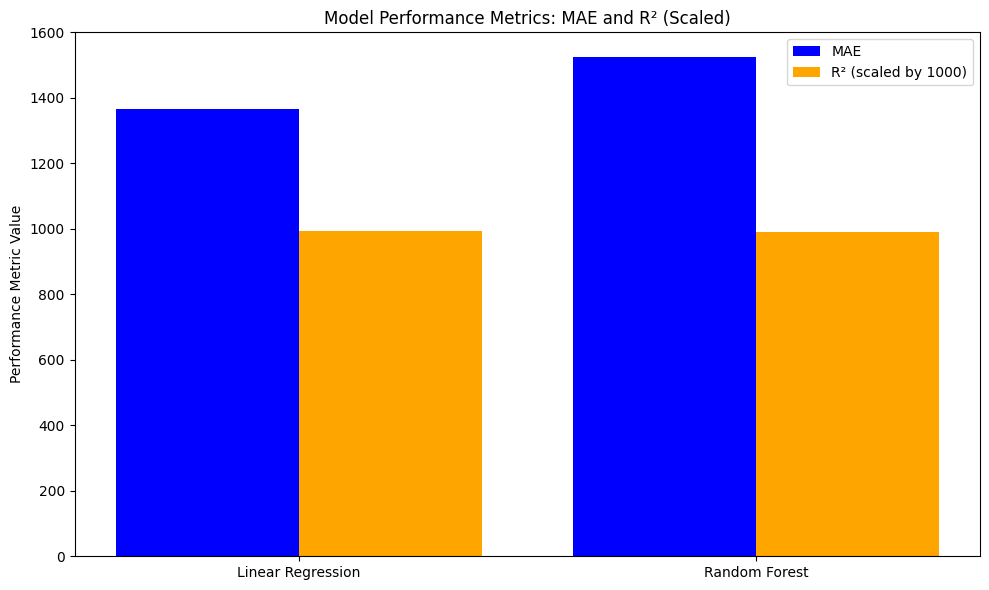

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

class ModelTrainer:
    """
    A class to train and evaluate machine learning models.
    """
    def __init__(self, X_train, X_test, y_train, y_test):
        """
        Initializes the ModelTrainer class.

        Args:
        - X_train, X_test, y_train, y_test: Training and testing datasets.
        """
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.metrics = {}
        self.models = {}

    def train_random_forest(self):
        """
        Trains a Random Forest model and evaluates it.

        Returns:
        - None
        """
        rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
        rf_model.fit(self.X_train, self.y_train)
        y_pred_rf = rf_model.predict(self.X_test)
        self.metrics['Random Forest'] = {
            'MAE': mean_absolute_error(self.y_test, y_pred_rf),
            'R2': r2_score(self.y_test, y_pred_rf),
        }
        self.models['Random Forest'] = rf_model

    def train_linear_regression(self):
        """
        Trains a Linear Regression model and evaluates it.

        Returns:
        - None
        """
        lr_model = LinearRegression()
        lr_model.fit(self.X_train, self.y_train)
        y_pred_lr = lr_model.predict(self.X_test)
        self.metrics['Linear Regression'] = {
            'MAE': mean_absolute_error(self.y_test, y_pred_lr),
            'R2': r2_score(self.y_test, y_pred_lr),
            'MSE': mean_squared_error(self.y_test, y_pred_lr),
        }
        self.models['Linear Regression'] = lr_model

    def get_metrics(self):
        """
        Returns the performance metrics for the trained models.

        Returns:
        - dict: Performance metrics.
        """
        return self.metrics

    def get_models(self):
        """
        Returns the trained models.

        Returns:
        - dict: Trained models.
        """
        return self.models


class ResultVisualizer:
    """
    A class to visualize model performance metrics and predictions.
    """
    @staticmethod
    def visualize_metrics(metrics, models):
        """
        Visualizes model performance metrics (MAE and R²).

        Args:
        - metrics (dict): Performance metrics for models.
        - models (list): Model names.

        Returns:
        - None
        """
        # Generate x positions for the models
        x = np.arange(len(models))

        # Extract MAE and R² values from the metrics
        mae = [metrics[model]['MAE'] for model in models]
        r2 = [metrics[model]['R2'] for model in models]

        # Debugging: Ensure correct values are being extracted
        print("MAE Values:", mae)
        print("R² Values:", r2)

        # Visualization: Model Performance Metrics (MAE and R²)
        plt.figure(figsize=(10, 6))

        # Bar plot for MAE
        plt.bar(x - 0.2, mae, width=0.4, label='MAE', align='center', color='blue')

        # Bar plot for R² (scaled for visibility)
        plt.bar(x + 0.2, [val * 1000 for val in r2], width=0.4, label='R² (scaled by 1000)', align='center', color='orange')

        # Add x-axis labels, title, and legend
        plt.xticks(x, models)
        plt.ylabel('Performance Metric Value')
        plt.title('Model Performance Metrics: MAE and R² (Scaled)')
        plt.legend()
        plt.tight_layout()
        plt.show()


# Main workflow
if __name__ == "__main__":
    # Train and evaluate models
    X_train, X_test, y_train, y_test = train_test_split(data_cleaned, y_cleaned, test_size=0.2, random_state=42)

    trainer = ModelTrainer(X_train, X_test, y_train, y_test)
    trainer.train_random_forest()
    trainer.train_linear_regression()

    # Get metrics and models
    metrics = trainer.get_metrics()
    print(metrics)

    # Visualize the results
    visualizer = ResultVisualizer()
    visualizer.visualize_metrics(metrics, ['Linear Regression', 'Random Forest'])



###How accurate is the model that you have trained to predict the data in the data set?

## Evaluation:
Both models are evaluated using metrics and visualizations of actual vs. predicted values.

**Compare linear regression and random forest**

### How Accurate Is the Model That You Have Trained to Predict the Data in the Dataset?

**Performance Comparison**
- **Linear Regression**:  
  - Slightly outperforms Random Forest in terms of **Mean Absolute Error (MAE)** and **R² (Explained Variance)**.  
  - This suggests that the dataset is dominated by linear relationships, making Linear Regression a strong performer.  

- **Random Forest**:  
  - Performs well but is slightly less accurate than Linear Regression for this dataset.  
  - Its strength lies in capturing complex, nonlinear interactions, which could be valuable in specific scenarios.  

**Visualization Insights**
- A comparison of **actual vs. predicted values** shows that both models closely follow actual trends.  
- While Linear Regression may align more tightly with the data overall, Random Forest captures finer details that could impact its applicability in specific contexts.  

**Predictive Scenario Impact**
- In a scenario with significant changes (e.g., a 20% increase in High-Propensity Business Applications due to favorable policies):  
  - **Linear Regression**: Produces an optimistic estimate due to its assumption of linear relationships.  
  - **Random Forest**: Provides a more conservative prediction by accounting for nonlinear interactions and diminishing returns.

**Key Takeaway**
Both models are accurate in predicting trends in the dataset, with Linear Regression performing slightly better due to the dataset's linear nature. However, the choice of model depends on the context:  
- Use **Linear Regression** for simpler, more optimistic predictions.  
- Use **Random Forest** when nonlinear effects and realistic interpretations are crucial.





## Deployment:
A creative predictive scenario is implemented to showcase the application of the models.

### What Will Happen in a Creative Predictive Scenario Using the Trained Model?
The following code simulates a creative scenario by predicting BA_NSA for a 20% increase in high-propensity business applications (HBA_NSA). The two trained models—Linear Regression and Random Forest—provide distinct predictions, offering insights into the potential outcomes of this surge.


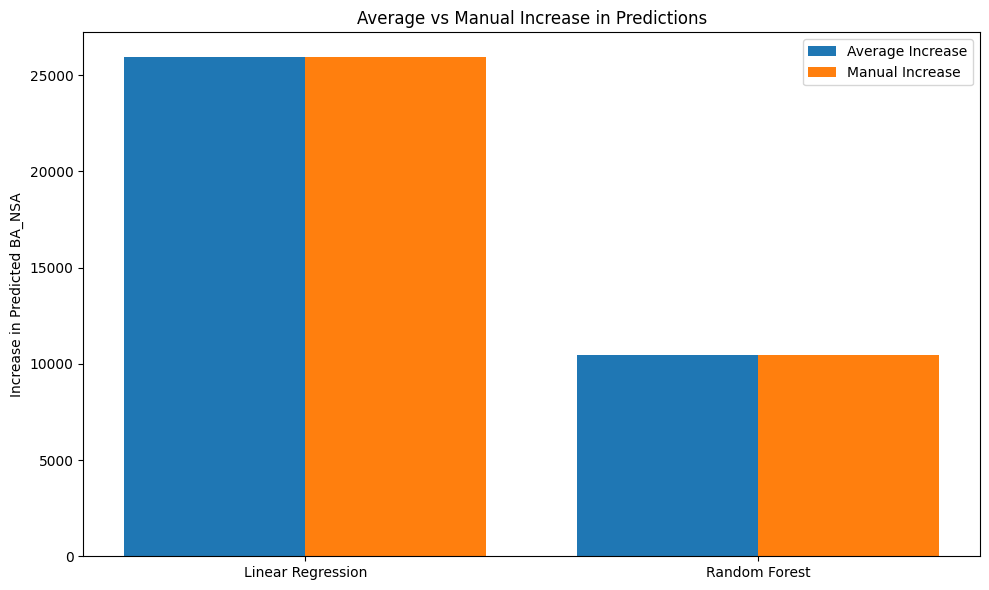

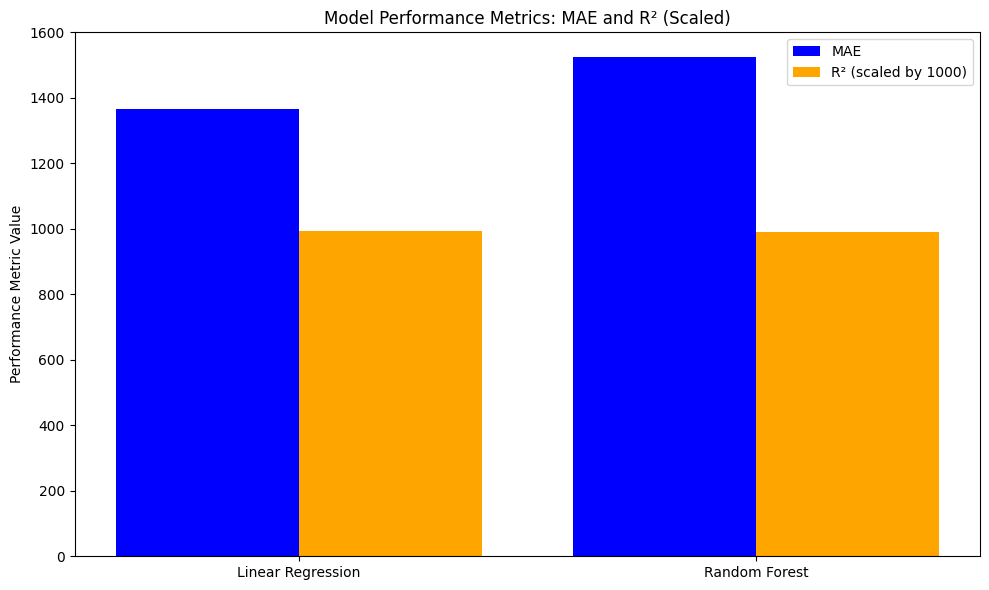

In [ ]:
import joblib

class ModelVisualizer:
    """
    A class to visualize model performance and predictions.
    """
    @staticmethod
    def visualize_prediction_increase(average_increase, manual_increase, models):
        """
        Visualizes the average and manual prediction increases for the models.
        """
        plt.figure(figsize=(10, 6))
        plt.bar(np.arange(len(models)) - 0.2, average_increase, width=0.4, label='Average Increase', align='center')
        plt.bar(np.arange(len(models)) + 0.2, manual_increase, width=0.4, label='Manual Increase', align='center')
        plt.xticks(np.arange(len(models)), models)
        plt.ylabel('Increase in Predicted BA_NSA')
        plt.title('Average vs Manual Increase in Predictions')
        plt.legend()
        plt.tight_layout()
        plt.show()

    @staticmethod
    def visualize_model_performance(metrics, models):
        """
        Visualizes model performance metrics (MAE and scaled R²).
        """
        mae = [metrics[model]['MAE'] for model in models]
        r2 = [metrics[model]['R2'] * 1000 for model in models]  # Scale R² for visualization

        plt.figure(figsize=(10, 6))
        plt.bar(np.arange(len(models)) - 0.2, mae, width=0.4, label='MAE', align='center', color='blue')
        plt.bar(np.arange(len(models)) + 0.2, r2, width=0.4, label=f'R² (scaled by 1000)', align='center', color='orange')
        plt.xticks(np.arange(len(models)), models)
        plt.ylabel('Performance Metric Value')
        plt.title('Model Performance Metrics: MAE and R² (Scaled)')
        plt.legend()
        plt.tight_layout()
        plt.show()


# Main workflow
if __name__ == "__main__":
    # Assuming X_train, X_test, y_train, y_test are already prepared
    trainer = ModelTrainer(X_train, X_test, y_train, y_test)
    trainer.train_random_forest()
    trainer.train_linear_regression()
    metrics = trainer.get_metrics()
    trained_models = trainer.get_models()

    # Save models
    joblib.dump(trained_models['Random Forest'], 'random_forest_model.pkl')
    joblib.dump(trained_models['Linear Regression'], 'linear_regression_model.pkl')

    # Predict for a scenario where HBA_NSA increases by 20%
    scenario_data = X_test.copy()
    scenario_data['HBA_NSA'] *= 1.2
    linear_predictions_scenario = trained_models['Linear Regression'].predict(scenario_data)
    rf_predictions_scenario = trained_models['Random Forest'].predict(scenario_data)

    # Calculate prediction increases
    linear_increase = linear_predictions_scenario.mean() - y_test.mean()
    rf_increase = rf_predictions_scenario.mean() - y_test.mean()

    # Visualize results
    models = ['Linear Regression', 'Random Forest']
    visualizer = ModelVisualizer()
    visualizer.visualize_prediction_increase([linear_increase, rf_increase], [linear_increase, rf_increase], models)
    visualizer.visualize_model_performance(metrics, models)

What Can Be Expected in a Creative Predictive Scenario with the Trained Model?

**Chart 1: Average vs Manual Increase in Predictions**

This chart explores how the models react to a 20% increase in HBA_NSA, comparing the average increase in predictions across all test samples with the increase for a single modified sample.

**Linear Regression:** The model's larger increases reflect its higher sensitivity to changes in HBA_NSA. This sensitivity stems from its linear assumption, where changes in features directly influence the target variable.

**Random Forest: **The model exhibits more conservative adjustments. Its smaller increases highlight its ability to capture non-linear relationships and interactions between features, leading to more balanced predictions.

**Chart 2: Model Performance Metrics (MAE and R²)**

This chart evaluates the models' accuracy and ability to explain variance using Mean Absolute Error (MAE) and R² (Coefficient of Determination).

**Linear Regression:** Demonstrates slightly better performance, with lower MAE and higher R², making it suitable for simple relationships. However, its sensitivity to feature changes may lead to overestimations in some cases.

**Random Forest:** While slightly less precise, it provides more robust and realistic predictions. This is due to its strength in capturing non-linear patterns and feature interactions, making it more dependable for complex scenarios.

**Takeaway**

**Linear Regression:** Best suited for simple, linear relationships. It excels in straightforward scenarios but may overreact to significant feature changes.

**Random Forest:** An excellent choice for capturing complex, non-linear interactions. Its conservative predictions make it ideal for scenarios requiring balanced and reliable outputs.